### make data

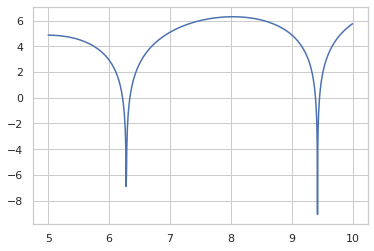

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
x = np.linspace(5, 10, 1000)
y = np.log(np.sin(x) * np.cos(x) * (-2*x + x**2 + x**3 + 3) * np.tan(x))
plt.plot(x, y)

### split data

In [5]:
#https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets
shuffle_dataset = 1
validation_split = .2

dataset_size = len(x)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset:
    np.random.seed(99)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

In [9]:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

x = x.reshape(-1, 1)
train_loader = torch.utils.data.DataLoader(x, batch_size=100, sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(x, batch_size=100, sampler=valid_sampler)

### model

In [10]:
class simpleNet(nn.Module):
    def __init__(self):
        super(simpleNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features=1, out_features=2**15),
            nn.ReLU(),
            nn.Linear(in_features=2**15, out_features=1)
        )
    
    def forward(self, x):
        x = self.fc(x)
        return x        

In [11]:
net = simpleNet()
criterion, optimizer = nn.MSELoss(), optim.Adam(net.parameters(), lr = 1e-7)
running_loss = .0
losses = []
val_losses = []

for epoch in range(100):
    net.train()
    total_loss = 0
    for batch_idx, data in enumerate(train_loader):
        optimizer.zero_grad()

        label = y[train_indices[batch_idx*100 : (batch_idx+1)*100]]
        data = torch.tensor(data, dtype=torch.float)
        label = torch.tensor(label, dtype=torch.float)
        
        data = Variable(data, requires_grad=True)
        label = Variable(label, requires_grad=True)
        
        output = net(data).view(-1)
        loss = criterion(output, label)
        total_loss += loss
        loss.backward()
        optimizer.step()
        print('train loss', loss)
    losses.append(total_loss/len(train_loader)) #batch가 10개 라면, 총 10개 loss의 평균
    
    net.eval()
    val_total_loss = 0
    for batch_idx, data in enumerate(validation_loader):
        optimizer.zero_grad()
        data = torch.tensor(data, dtype=torch.float)
        label = y[val_indices[batch_idx*100 : (batch_idx+1)*100]]
        label = torch.tensor(label, dtype=torch.float)

        outputs = net(data).view(-1)
        loss = criterion(outputs, label)
        val_total_loss += loss
        loss.backward()
        optimizer.step()
        print('val loss', loss)
    val_losses.append(val_total_loss/len(validation_loader))


train loss tensor(17.6158, grad_fn=<MeanBackward0>)
train loss tensor(16.0616, grad_fn=<MeanBackward0>)
train loss tensor(16.0343, grad_fn=<MeanBackward0>)
train loss tensor(15.5832, grad_fn=<MeanBackward0>)
train loss tensor(15.6895, grad_fn=<MeanBackward0>)
train loss tensor(16.2700, grad_fn=<MeanBackward0>)
train loss tensor(15.8010, grad_fn=<MeanBackward0>)
train loss tensor(17.1494, grad_fn=<MeanBackward0>)
val loss tensor(17.6032, grad_fn=<MseLossBackward>)
val loss tensor(17.3555, grad_fn=<MseLossBackward>)
train loss tensor(17.1480, grad_fn=<MeanBackward0>)
train loss tensor(15.5914, grad_fn=<MeanBackward0>)
train loss tensor(15.1954, grad_fn=<MeanBackward0>)
train loss tensor(15.0665, grad_fn=<MeanBackward0>)
train loss tensor(15.1908, grad_fn=<MeanBackward0>)
train loss tensor(15.9922, grad_fn=<MeanBackward0>)
train loss tensor(15.4446, grad_fn=<MeanBackward0>)
train loss tensor(17.0333, grad_fn=<MeanBackward0>)
val loss tensor(17.1974, grad_fn=<MseLossBackward>)
val loss ten

train loss tensor(10.5046, grad_fn=<MeanBackward0>)
train loss tensor(9.7478, grad_fn=<MeanBackward0>)
train loss tensor(10.6317, grad_fn=<MeanBackward0>)
train loss tensor(10.3995, grad_fn=<MeanBackward0>)
train loss tensor(11.0134, grad_fn=<MeanBackward0>)
train loss tensor(10.0153, grad_fn=<MeanBackward0>)
train loss tensor(11.6573, grad_fn=<MeanBackward0>)
val loss tensor(11.6161, grad_fn=<MseLossBackward>)
val loss tensor(11.3496, grad_fn=<MseLossBackward>)
train loss tensor(11.7369, grad_fn=<MeanBackward0>)
train loss tensor(9.8180, grad_fn=<MeanBackward0>)
train loss tensor(9.6793, grad_fn=<MeanBackward0>)
train loss tensor(9.9464, grad_fn=<MeanBackward0>)
train loss tensor(9.4746, grad_fn=<MeanBackward0>)
train loss tensor(11.0954, grad_fn=<MeanBackward0>)
train loss tensor(10.0676, grad_fn=<MeanBackward0>)
train loss tensor(11.4734, grad_fn=<MeanBackward0>)
val loss tensor(11.4476, grad_fn=<MseLossBackward>)
val loss tensor(10.9989, grad_fn=<MseLossBackward>)
train loss tensor

train loss tensor(7.4007, grad_fn=<MeanBackward0>)
train loss tensor(7.4715, grad_fn=<MeanBackward0>)
train loss tensor(8.1275, grad_fn=<MeanBackward0>)
train loss tensor(6.3046, grad_fn=<MeanBackward0>)
train loss tensor(8.1548, grad_fn=<MeanBackward0>)
val loss tensor(7.8913, grad_fn=<MseLossBackward>)
val loss tensor(7.9117, grad_fn=<MseLossBackward>)
train loss tensor(9.1524, grad_fn=<MeanBackward0>)
train loss tensor(6.5348, grad_fn=<MeanBackward0>)
train loss tensor(6.1103, grad_fn=<MeanBackward0>)
train loss tensor(7.2273, grad_fn=<MeanBackward0>)
train loss tensor(6.8612, grad_fn=<MeanBackward0>)
train loss tensor(8.3389, grad_fn=<MeanBackward0>)
train loss tensor(6.7955, grad_fn=<MeanBackward0>)
train loss tensor(7.5499, grad_fn=<MeanBackward0>)
val loss tensor(7.5027, grad_fn=<MseLossBackward>)
val loss tensor(8.0384, grad_fn=<MseLossBackward>)
train loss tensor(8.6272, grad_fn=<MeanBackward0>)
train loss tensor(6.5800, grad_fn=<MeanBackward0>)
train loss tensor(6.7116, grad_

train loss tensor(7.3962, grad_fn=<MeanBackward0>)
train loss tensor(4.7965, grad_fn=<MeanBackward0>)
train loss tensor(6.3762, grad_fn=<MeanBackward0>)
val loss tensor(5.0756, grad_fn=<MseLossBackward>)
val loss tensor(6.4100, grad_fn=<MseLossBackward>)
train loss tensor(7.3548, grad_fn=<MeanBackward0>)
train loss tensor(4.7643, grad_fn=<MeanBackward0>)
train loss tensor(4.1777, grad_fn=<MeanBackward0>)
train loss tensor(5.8968, grad_fn=<MeanBackward0>)
train loss tensor(5.6002, grad_fn=<MeanBackward0>)
train loss tensor(5.9555, grad_fn=<MeanBackward0>)
train loss tensor(4.9986, grad_fn=<MeanBackward0>)
train loss tensor(6.2807, grad_fn=<MeanBackward0>)
val loss tensor(5.8730, grad_fn=<MseLossBackward>)
val loss tensor(5.5903, grad_fn=<MseLossBackward>)
train loss tensor(6.6033, grad_fn=<MeanBackward0>)
train loss tensor(4.7755, grad_fn=<MeanBackward0>)
train loss tensor(4.3623, grad_fn=<MeanBackward0>)
train loss tensor(6.3413, grad_fn=<MeanBackward0>)
train loss tensor(5.4065, grad_

val loss tensor(4.9258, grad_fn=<MseLossBackward>)
val loss tensor(4.7695, grad_fn=<MseLossBackward>)
train loss tensor(7.3791, grad_fn=<MeanBackward0>)
train loss tensor(3.5789, grad_fn=<MeanBackward0>)
train loss tensor(3.3573, grad_fn=<MeanBackward0>)
train loss tensor(5.1885, grad_fn=<MeanBackward0>)
train loss tensor(4.4310, grad_fn=<MeanBackward0>)
train loss tensor(6.1179, grad_fn=<MeanBackward0>)
train loss tensor(4.2300, grad_fn=<MeanBackward0>)
train loss tensor(5.7238, grad_fn=<MeanBackward0>)
val loss tensor(4.5251, grad_fn=<MseLossBackward>)
val loss tensor(5.1766, grad_fn=<MseLossBackward>)
train loss tensor(6.2247, grad_fn=<MeanBackward0>)
train loss tensor(4.0609, grad_fn=<MeanBackward0>)
train loss tensor(4.0171, grad_fn=<MeanBackward0>)
train loss tensor(5.0913, grad_fn=<MeanBackward0>)
train loss tensor(4.6455, grad_fn=<MeanBackward0>)
train loss tensor(6.0392, grad_fn=<MeanBackward0>)
train loss tensor(4.1082, grad_fn=<MeanBackward0>)
train loss tensor(5.5518, grad_

train loss tensor(3.6718, grad_fn=<MeanBackward0>)
train loss tensor(3.0619, grad_fn=<MeanBackward0>)
train loss tensor(5.0524, grad_fn=<MeanBackward0>)
train loss tensor(4.2507, grad_fn=<MeanBackward0>)
train loss tensor(5.5473, grad_fn=<MeanBackward0>)
train loss tensor(3.6265, grad_fn=<MeanBackward0>)
train loss tensor(4.3267, grad_fn=<MeanBackward0>)
val loss tensor(3.6517, grad_fn=<MseLossBackward>)
val loss tensor(4.6824, grad_fn=<MseLossBackward>)
train loss tensor(5.7317, grad_fn=<MeanBackward0>)
train loss tensor(3.4427, grad_fn=<MeanBackward0>)
train loss tensor(3.0345, grad_fn=<MeanBackward0>)
train loss tensor(5.4757, grad_fn=<MeanBackward0>)
train loss tensor(4.9518, grad_fn=<MeanBackward0>)
train loss tensor(6.1274, grad_fn=<MeanBackward0>)
train loss tensor(3.3379, grad_fn=<MeanBackward0>)
train loss tensor(4.2046, grad_fn=<MeanBackward0>)
val loss tensor(3.5248, grad_fn=<MseLossBackward>)
val loss tensor(4.2766, grad_fn=<MseLossBackward>)
train loss tensor(7.0803, grad_

train loss tensor(3.3877, grad_fn=<MeanBackward0>)
train loss tensor(4.8109, grad_fn=<MeanBackward0>)
train loss tensor(3.7489, grad_fn=<MeanBackward0>)
train loss tensor(5.3211, grad_fn=<MeanBackward0>)
train loss tensor(3.1325, grad_fn=<MeanBackward0>)
train loss tensor(4.4446, grad_fn=<MeanBackward0>)
val loss tensor(3.1421, grad_fn=<MseLossBackward>)
val loss tensor(4.1994, grad_fn=<MseLossBackward>)
train loss tensor(6.9966, grad_fn=<MeanBackward0>)
train loss tensor(3.3473, grad_fn=<MeanBackward0>)
train loss tensor(3.5839, grad_fn=<MeanBackward0>)
train loss tensor(6.1439, grad_fn=<MeanBackward0>)
train loss tensor(3.7191, grad_fn=<MeanBackward0>)
train loss tensor(5.9345, grad_fn=<MeanBackward0>)
train loss tensor(4.0859, grad_fn=<MeanBackward0>)
train loss tensor(4.8029, grad_fn=<MeanBackward0>)
val loss tensor(2.9960, grad_fn=<MseLossBackward>)
val loss tensor(5.1175, grad_fn=<MseLossBackward>)
train loss tensor(5.8649, grad_fn=<MeanBackward0>)
train loss tensor(3.4552, grad_

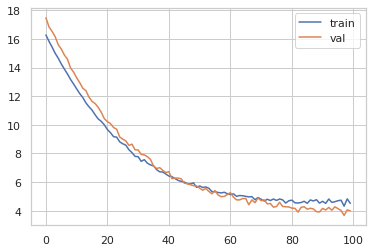

In [12]:
%matplotlib inline
plt.plot(losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()

# ver2

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.optim as optim

def f_x(x):
    return x**2 + x**3

def make_dataset():
    data = []
    for i in range(1, 100):
        data.append((i, f_x(i), 1))
    for j in range(100, 201):
        data.append((j, f_x(j), 0))
    column_names = ['x', 'f_x', 'is_f_x']
    df = pd.DataFrame(data, columns=column_names)
    return df
    
df = make_dataset()

In [ ]:
class simpleNet(nn.Module):
    def __init__(self):
        super(simpleNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features=1, out_features=2**15),
            nn.ReLU(),
            nn.Linear(in_features=2**15, out_features=1)
        )
    
    def forward(self, x):
        x = self.fc(x)
        return x        

In [ ]:
class simpleNet2(nn.Module):
    def __init__(self):
        super(simpleNet2, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear())